#### <b>`Logistic Regression`<b>
Target: Species

Actual iris.csv file data (150, 5)
Duplicates Found: 1
Removing Duplicates...
Removed Duplicates...
Logistic Regression Train Model Score: 0.9797979797979798
Logistic Test Model Score: 0.94
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50

   sepal_length  sepal_width  petal_length  petal_width Species_Predicted  \
0           5.5          2.5           4.0          1.3        versicolor   
1           6.9          3.1           5.1          2.3         virginica   

   setosa  versicolor  virginica  
0  0.0187      0.8839     0.0974  
1  0.0002      0.0597     0.9401  


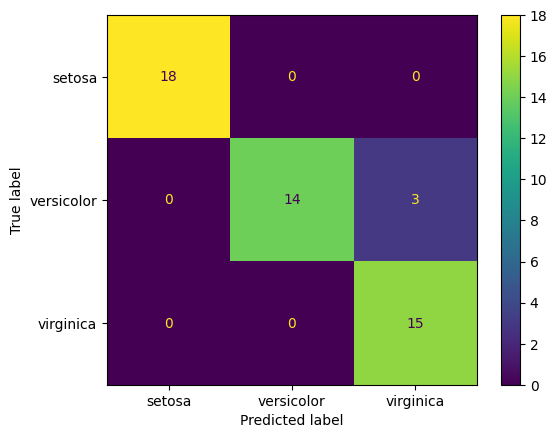

In [7]:
from warnings import filterwarnings
filterwarnings("ignore")

#----------------------
#Step-1: Data Ingestion
#----------------------

import pandas as pd
df = pd.read_csv("iris.csv")
print('Actual iris.csv file data', df.shape)

#----------------------------------------
#Step-2: Data Sanity - Duplicate removals
#----------------------------------------

duplicate_count = df.duplicated().sum()

if duplicate_count > 0:
    print(f'Duplicates Found: {duplicate_count}')
    print('Removing Duplicates...')
    df = df.drop_duplicates(keep = "first").reset_index(drop = True)
    print('Removed Duplicates...')
    df.shape
else:
    print('No Duplicates Found')

#------------------------
#Step-3: Separate X and Y
#------------------------

X = df.drop(columns = ["species"])
Y = df["species"]
X.head(1)

#-----------------------------------
#Step-4: Remove High Unique Cat Cols
#-----------------------------------
card = df.select_dtypes(include = "object").nunique() / len(df)
high_card = card[card >= 0.9]
X = X.drop(columns = high_card.index)

#------------------------
#Step-5: Train Test Split
#------------------------
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=21)

#--------------------------------
#Step-6: Apply Preprocessing on X
#--------------------------------
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipe = make_pipeline(
    SimpleImputer(strategy= "median"),
    StandardScaler()
).set_output(transform="pandas")

num_pipe.fit(xtrain)

xtrain_pre = num_pipe.transform(xtrain)
xtest_pre = num_pipe.transform(xtest)

#-------------------
#Step-7: Build Model
#-------------------
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain_pre, ytrain)
print(f'Logistic Regression Train Model Score: {model.score(xtrain_pre, ytrain)}')
print(f'Logistic Test Model Score: {model.score(xtest_pre, ytest)}')

#------------------------
#Step-8: Evaluate Metrics
#------------------------
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, xtest_pre, ytest)

from sklearn.metrics import classification_report
ytest_pred = model.predict(xtest_pre)
print(classification_report(ytest, ytest_pred))

#---------------------------------------
#Step-9: Model Inference (Out of Sample)
#---------------------------------------
xnew = pd.read_csv("iris_sample.csv")
xnew_pre = num_pipe.transform(xnew)
# Prediction & Probability
ynew_pre = model.predict(xnew_pre)
ynew_prob = model.predict_proba(xnew_pre)

xnew['Species_Predicted'] = ynew_pre
xnew[model.classes_] = ynew_prob.round(4)
print(xnew.head(2))

#Step-10: Save & Load Model
import joblib
# joblib.dump(model, "iris_model.joblib")
# joblib.dump(num_pipe, "pre.joblib")
p = joblib.load("pre.joblib")
